In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
#setting option to display full content rather than truncating at 50 characters
pd.set_option('display.max_colwidth', -1)
sns.set()

# Data Storytelling 0

## Import Dataset

In [4]:
#import all datasets
df_con = pd.read_csv('data/df_concat.csv')
df_name = pd.read_csv('data/df_name0.csv')
df_pr = pd.read_csv('data/df_pr0.csv')
df_rate = pd.read_csv('data/df_concat_rate.csv')


df_con.drop("Unnamed: 0", axis=1, inplace=True)
df_name.drop("Unnamed: 0", axis=1, inplace=True)
df_pr.drop("Unnamed: 0", axis=1, inplace=True)
df_rate.drop("Unnamed: 0", axis=1, inplace=True)


## Data Wrangling continues

### Top Genres

Let's start by checking how many of each of these genre components were use in overall movie production through out history.

In [5]:
# list of genre types will be useful here.
genre_type = ['Romance', 'Documentary', 'News', 'Sport', 'Biography', 'Drama', 'Crime', 'Adventure', 'Fantasy', 'Comedy', 'War', 'Family', 'History', 'SciFi', 'Western', 'Thriller', 'Mystery', 'Horror', 'Action', 'Music', 'Short', 'Animation', 'Musical', 'FilmNoir', 'TalkShow', 'Adult', 'RealityTV', 'GameShow']


In [6]:
#create a list of count values for all genre types
genre_sum = []

#loop creates a list of genre type sum (count) that matches the order of genre_type
for gen in genre_type:
    
    genre_sum.append(df_con[gen].sum())


#creating a dataframe that combines the genre_type and genre_sum
df_gen = pd.DataFrame([genre_sum] , columns=genre_type)
df_gen

,Romance,Documentary,News,Sport,Biography,Drama,Crime,Adventure,Fantasy,Comedy,...,Action,Music,Short,Animation,Musical,FilmNoir,TalkShow,Adult,RealityTV,GameShow
0,37055,92126,1704,4429,13686,173248,28431,22045,10587,85237,...,39328,9135,16,5793,8544,773,40,5899,143,7


Now we have a single row dataframe containing all counts of each genres in our master dataframe.
This will be useful in creating charts a bit down the road.  

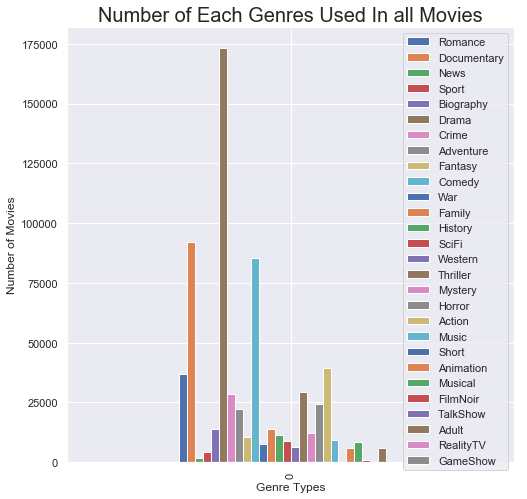

In [37]:

count_gen = df_gen.plot.bar(figsize=(8,8))

count_gen.set_title('Number of Each Genres Used In all Movies', fontsize=20)
count_gen.set_xlabel('Genre Types')
count_gen.set_ylabel('Number of Movies')

plt.show()

In [32]:
topsix = np.argsort(genre_sum)[:-7:-1]
rank=1
for i in topfive:
    print(rank,': ',genre_type[i])
    rank+=1

1 :  Drama
2 :  Documentary
3 :  Comedy
4 :  Action
5 :  Romance
6 :  Thriller


We can see from this bar chart that Drama genre is the most widely used in the history of films.  Other notable mentions in the genres are Documentary, Comedy coming in behind. Then Romance, Thriller and Action.

##### Now, we will reorganize the dataframe to group by movies per decades and focus on the top 5 genres we found above.

In [33]:
#this is a neat way to check for duplicates in a list
len(genre_sum) != len(set(genre_sum))

False

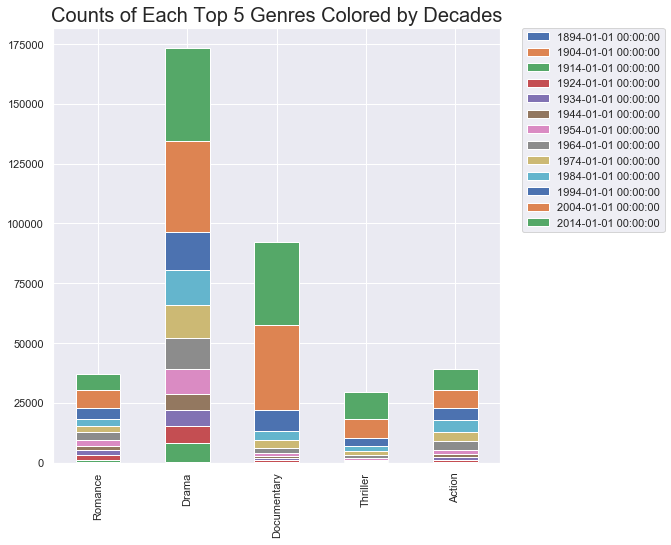

In [42]:
#extracts top five movie genre counts per year
test = df_con.groupby('startYear')[genre_type].sum()[['Romance','Drama','Documentary','Thriller','Action']]
#print(test.head())

#year data is currently in floats, changing this to int so we can convert this column to datetime type
test['startYear'] = test.index
test['startYear']= test['startYear'].astype(int)
test['startYear']

test['startYear'] = pd.to_datetime(test['startYear'], format='%Y')

#reset the startYear to index as the datetime object
test.set_index(pd.DatetimeIndex(test['startYear']), inplace=True)

#resampling the dataframe to decade counts 
#We will only grab up to 2014-01-01 decade which will be until year 2023. 
#There are some data here that goes up to year 2115 and will take up unnecessary space during chart generation.
test1=test.resample('10AS').sum()[:'2014']


#seaborn stacked bar chart 
test1['startYear'] = test1.index
test1.set_index('startYear').T.plot(kind='bar', stacked=True,figsize=(8,8) )

plt.title('Counts of Each Top 5 Genres Colored by Decades',fontsize=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()





Above chart shows top 5 genres count throughout the decades but this chart is very difficult to make sense of.  We'll try another way.

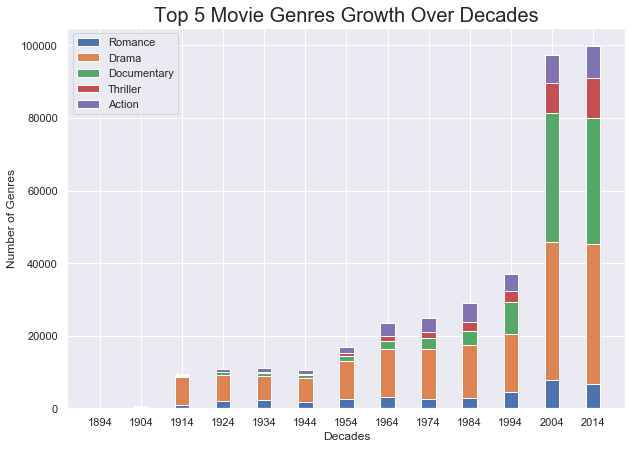

In [43]:
decades = test1.index.year
barRomance = test1.iloc[:,0]
barDrama = test1.iloc[:,1]
barDocumentary = test1.iloc[:,2]
barThriller = test1.iloc[:,3]
barAction = test1.iloc[:,4]
indx = np.arange(len(test1))

plt.figure(figsize=(10,7))

graphRomance = plt.bar(x=indx, height=barRomance, width = 0.35)
graphDrama = plt.bar(x=indx, height=barDrama, width=0.35, bottom=barRomance)
graphDocumentary = plt.bar(x=indx, height=barDocumentary, width=0.35, bottom=barDrama+barRomance)
graphThriller = plt.bar(x=indx, height=barThriller, width=0.35, bottom = barDocumentary+barDrama+barRomance)
graphAction = plt.bar(x=indx, height=barAction, width=0.35, bottom=barThriller+barDocumentary+barDrama+barRomance)

plt.xlabel('Decades')
plt.ylabel('Number of Genres')

plt.xticks(indx,decades)

plt.legend((graphRomance[0],graphDrama[0],graphDocumentary[0],graphThriller[0],graphAction[0]),('Romance','Drama','Documentary','Thriller','Action'))

plt.title('Top 5 Movie Genres Growth Over Decades',fontsize=20)

plt.show()

There has been an increase on overall movie production from the 90's to 2000's. We can see from this chart that Drama has been and still is leading genre of all times and there has been a rapid growth in Documentary type of movies after year 2000. We can also see that the remaining genre types are also growing steadily as there are more movies being produced year after year. 

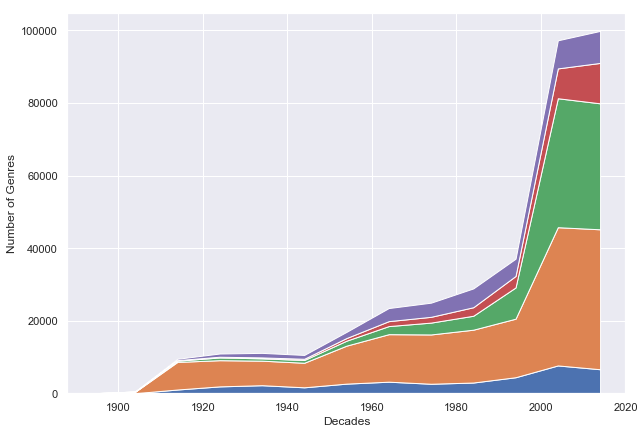

In [44]:
#line stackplot shows the changes a bit better than bar chart
plt.figure(figsize=(10,7))

plt.stackplot(decades,barRomance,barDrama,barDocumentary,barThriller,barAction)

plt.xlabel('Decades')
plt.ylabel('Number of Genres')

plt.show()

With line stackplot, we can see the growth in each of the top 5 genres clearer than bar chart.

### Movie Ratings

Now that we've seen the top genres and their changes throughout more than a century, let's take a look at how well they were received with the audience. We will need to use the dataset with rating available and unfortunately, the dataset with ratings contain around half of the full dataset that we have.  

In [12]:
df_rate.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,Romance,Documentary,...,Short,Animation,Musical,FilmNoir,TalkShow,Adult,RealityTV,GameShow,averageRating,numVotes
0,tt0000009,Miss Jerry,0,1894.0,45.0,Romance,nm0085156,nm0085156,1,0,...,0,0,0,0,0,0,0,0,5.5,80
1,tt0000147,The Corbett-Fitzsimmons Fight,0,1897.0,20.0,"Documentary,News,Sport",nm0714557,NaN,0,1,...,0,0,0,0,0,0,0,0,5.2,301
2,tt0000335,Soldiers of the Cross,0,1900.0,89.0,"Biography,Drama","nm0095714,nm0675140",NaN,0,0,...,0,0,0,0,0,0,0,0,6.3,39
3,tt0000574,The Story of the Kelly Gang,0,1906.0,70.0,"Biography,Crime,Drama",nm0846879,nm0846879,0,0,...,0,0,0,0,0,0,0,0,6.2,514
4,tt0000615,Robbery Under Arms,0,1907.0,89.0,Drama,nm0533958,"nm0092809,nm0533958",0,0,...,0,0,0,0,0,0,0,0,4.8,15


Rating is a numeric value ranging from 1 to 10.  We'll consider a rating over 7.5 a good movie and any movie below 5.0 a bad movie.

Let's first take a look at some of the well received movies.

In [13]:
#create dataframe of movies with rating higher than 7.5, higher than 8.8 and lower than 5.5
df_good = df_rate.loc[df_rate.averageRating >= 7.5]

df_excel = df_rate.loc[df_rate.averageRating >= 8.8]

df_legend = df_rate.loc[df_rate.averageRating >=9.5]

df_bad = df_rate.loc[df_rate.averageRating <= 5.5]

In [14]:
#create a list of count values for all genre types in df_good
genre_sum = []

#loop creates a list of genre type sum (count) that matches the order of genre_type
for gen in genre_type:
    
    genre_sum.append(df_good[gen].sum())
    
#creating a dataframe that combines the genre_type and genre_sum
dict_good = dict(zip(genre_type, genre_sum))

#let's sort the dictionary and grab the top 5 genres again
top5good = sorted(dict_good, key=dict_good.get, reverse=True)[:5]


In [15]:
#create a list of count values for all genre types in df_excel
genre_sum = []

#loop creates a list of genre type sum (count) that matches the order of genre_type
for gen in genre_type:
    
    genre_sum.append(df_excel[gen].sum())
    
#creating a dataframe that combines the genre_type and genre_sum
dict_excel = dict(zip(genre_type, genre_sum))

#let's sort the dictionary and grab the top 5 genres again
top5excel = sorted(dict_excel, key=dict_excel.get, reverse=True)[:5]


In [16]:
#create a list of count values for all genre types in df_good
genre_sum = []

#loop creates a list of genre type sum (count) that matches the order of genre_type
for gen in genre_type:
    
    genre_sum.append(df_legend[gen].sum())
    
#creating a dataframe that combines the genre_type and genre_sum
dict_legend = dict(zip(genre_type, genre_sum))

#let's sort the dictionary and grab the top 5 genres again
top5legend = sorted(dict_legend, key=dict_legend.get, reverse=True)[:5]


In [17]:
#create a list of count values for all genre types in df_good
genre_sum = []

#loop creates a list of genre type sum (count) that matches the order of genre_type
for gen in genre_type:
    
    genre_sum.append(df_bad[gen].sum())
    
#creating a dataframe that combines the genre_type and genre_sum
dict_bad = dict(zip(genre_type, genre_sum))

#let's sort the dictionary and grab the top 5 genres again
top5bad = sorted(dict_bad, key=dict_bad.get, reverse=True)[:5]


In [18]:
print(top5good)
print(top5excel)
print(top5legend)
print(top5bad)

['Drama', 'Documentary', 'Comedy', 'Romance', 'Biography']
['Documentary', 'Drama', 'Comedy', 'Biography', 'Music']
['Documentary', 'Drama', 'Comedy', 'Animation', 'Biography']
['Drama', 'Comedy', 'Action', 'Horror', 'Thriller']


We can see from above that mostly light hearted films are in the nice-to-watch range like Comedy, Drama, Romance.  Documentary and Biography and Music type of genres have been very well received. But relatviely heavier genres like Action, Horror and Thriller take the lead on bad movies list.

One thing to note is, we see Drama and Documentary in almost all our top 5's. This is not simply because there were a lot of movies made for Drama and Documentary but because these genres list can contain up to three genres per movie.  It is extremely easy for a movie to be classfied as Drama or Documentary together.  

So this does not mean that there are more Drama movies or Documentary movies being created compared to other genres.   This means that movies in the past and increasingly in the present, have been adopting quite a lot of drama-esque and documentary-esque features in their movies.  

### Popularity Metric

Most popular movie is a vague term and it was chosen for a reason.  If there is a movie where 10 people voted to be 10.0 rating and there is a movie with 5 rating but 1000 people voted. Which is the most popular movie?  
To account for the relationship between star rating and number of votes, we will use the equation below to identify the popularity:

###### popularity metric = averageRating * numVotes/totalVotes

In [46]:
totalVotes = df_rate.numVotes.sum()

In [47]:
df_pop = df_rate.copy()
df_pop['popularity'] = df_pop['averageRating'] * (df_pop['numVotes']/totalVotes)

In [48]:
#use groupby to get the highest rated movie of the year
movieOfYear = df_pop.groupby('startYear').apply(lambda x: x.loc[x.popularity == x.popularity.max(),['genres','averageRating','primaryTitle','numVotes','popularity','isAdult','runtimeMinutes','directors']])

movieOfYear.tail()


,,genres,averageRating,primaryTitle,numVotes,popularity,isAdult,runtimeMinutes,directors
startYear,,,,,,,,,
2015.0,141378,"Action,Adventure,Sci-Fi",8.1,Mad Max: Fury Road,785434,0.008392,0,120.0,nm0004306
2016.0,142586,"Action,Adventure,Comedy",8.0,Deadpool,826250,0.008719,0,108.0,nm1783265
2017.0,181365,"Action,Drama,Sci-Fi",8.1,Logan,566669,0.006055,0,137.0,nm0003506
2018.0,190573,"Action,Adventure,Sci-Fi",8.5,Avengers: Infinity War,683228,0.007661,0,149.0,"nm0751577,nm0751648"
2019.0,190574,"Action,Adventure,Sci-Fi",8.7,Avengers: Endgame,472578,0.005424,0,181.0,"nm0751648,nm0751577"


In [49]:
#having multi level index is difficult for us here, so we are resetting index first
movieOfYear = movieOfYear.reset_index(level=1, drop=True)


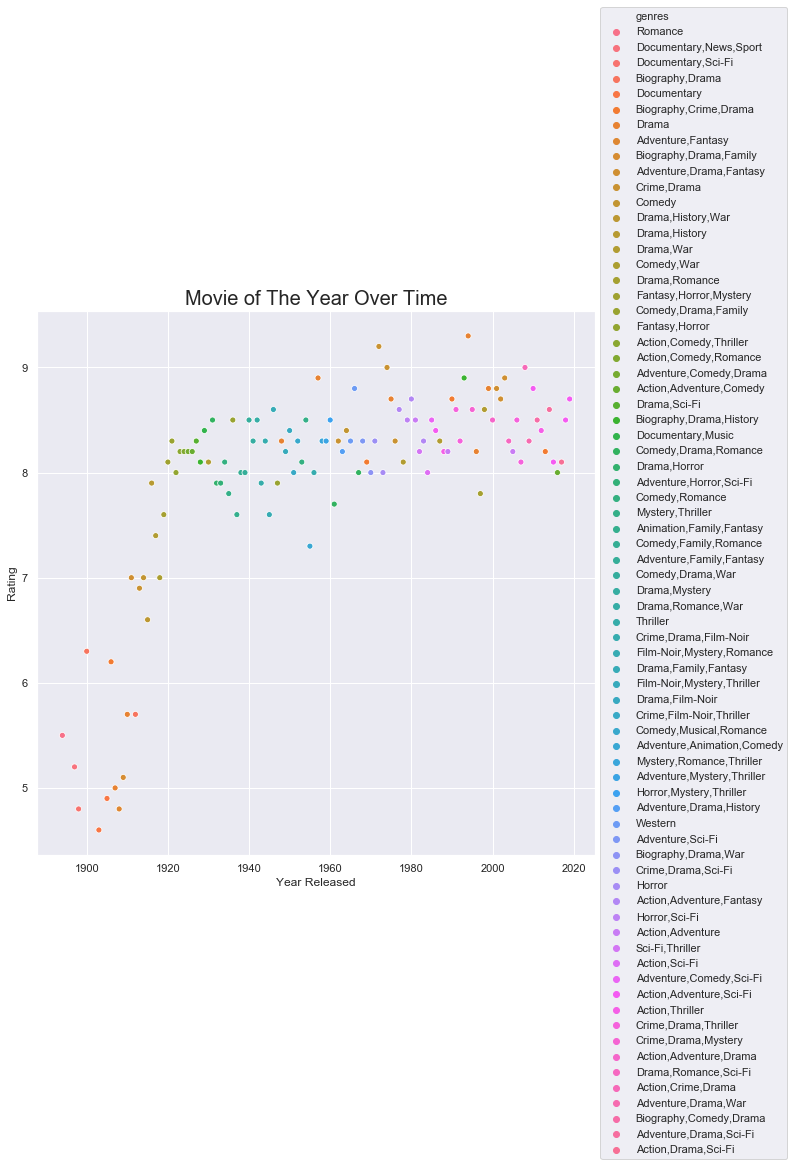

In [50]:
import mplcursors

plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=movieOfYear.index,y='averageRating',data=movieOfYear,hue='genres')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Movie of The Year Over Time',fontsize=20)
plt.xlabel('Year Released')
plt.ylabel('Rating')

mplcursors.cursor(ax,hover=True)

plt.show()



With the popularity metrics, we see better understanding of what the trend looks like.  As years go by, the overall rating for the most popular movie is increasing. For the trends, we have been seeing a lot more Drama, Film-noir, Adventure, Mystery hits in the early 90's and slowly transition into more of Sci-Fi, Thriller, Action. Drama toward more current year.

### Movie Runtime

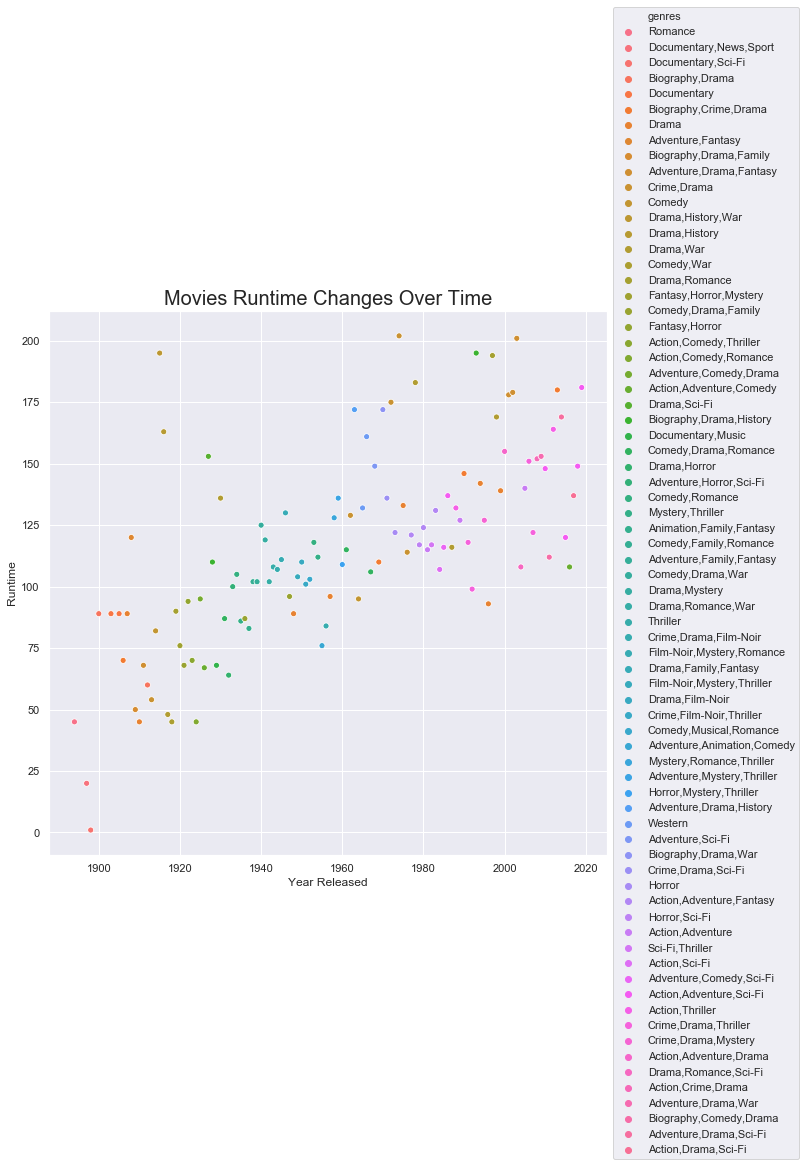

In [51]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=movieOfYear.index, y='runtimeMinutes',data=movieOfYear,hue='genres')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Movies Runtime Changes Over Time',fontsize=20)
plt.xlabel('Year Released')
plt.ylabel('Runtime')

plt.show()

We can see here that runtime for most popular movies are getting longer as well. It is interesting to note that from time to time, there are movies that runs for about 3 or more and these movies are mostly related to history and war.

### Adult Rating

In [54]:
#collecting only the adult movies
df_adult = df_pop[df_pop['isAdult']==1]


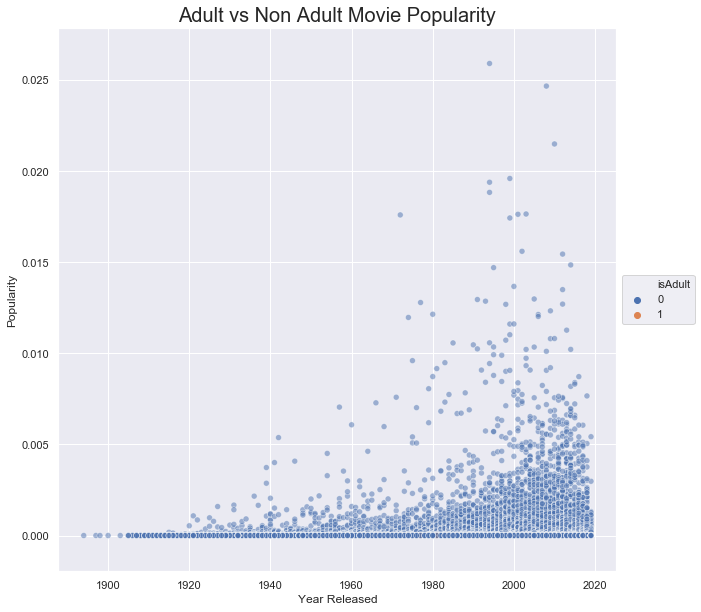

In [55]:

plt.figure(figsize=(10,10))
sns.scatterplot(x='startYear',y='popularity',data=df_pop,hue='isAdult',alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Adult vs Non Adult Movie Popularity',fontsize=20)
plt.xlabel('Year Released')
plt.ylabel('Popularity')

plt.show()


With the above graph, we are not able to see any of the adult movies.  This is because there are only about 3400 adult movies in the df_rate dataframe so even if we had them, they are covered by all other datapoints.

No handles with labels found to put in legend.


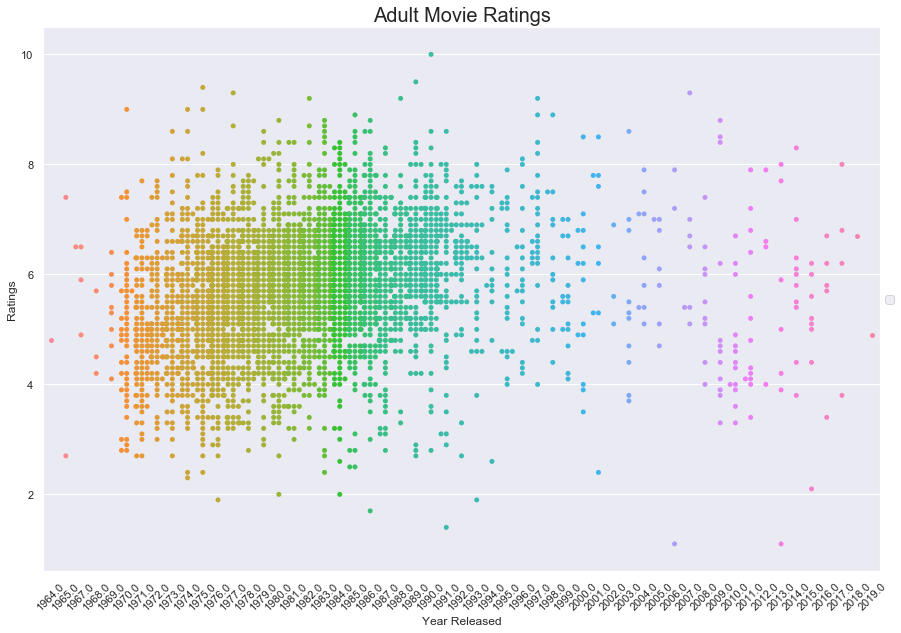

In [59]:

plt.figure(figsize=(15,10))
#sns.scatterplot(x='startYear',y='averageRating',data=df_adult)
ax = sns.swarmplot(x='startYear', y='averageRating', data=df_adult)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Adult Movie Ratings', fontsize=20)
plt.xlabel('Year Released')
plt.ylabel('Ratings')

plt.show()


Above plot shows the number of adult movies released through the years and their ratings.  We can see that we are getting less and less adult movies getting officially released.  After 2000, we are seeing around 10 adult movies getting released each year and is also on the downward trends. Although these movies may seem like they've gotten a good rating, this is bacause the rating data does not reflect whether the movie was popular or not. 5 people could have voted 10-star but that doesn't mean that this movie is a 10 star movie.

This above graph is to show the decreasing trend in adult movies getting released in theater.


No handles with labels found to put in legend.


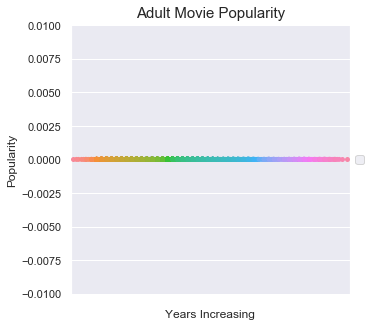

In [57]:
#to show that the actual popularity is very close to 0, here is the graph.

plt.figure(figsize=(5,5))
#sns.scatterplot(x='startYear',y='averageRating',data=df_adult)
ax = sns.swarmplot(x='startYear', y='popularity', data=df_adult)
ax.set_xticklabels([],rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Adult Movie Popularity',fontsize=15)
plt.xlabel('Years Increasing')
plt.ylabel('Popularity')

plt.show()



### Directors

In [60]:
#creating a copy of the movieOfYear dataframe to work with directors
movieOfYear_director=movieOfYear.copy()

#some movies have multiple directors associated, we will use the first director listed.
movieOfYear_director.directors = movieOfYear_director.directors.str.split(',').str[0]



In [61]:
#inner join on the directors column containing nconst
movieOfYear_director = pd.merge(left=movieOfYear,right=df_name, left_on='directors', right_on='nconst')

In [62]:
#we lost some rows as a result of df_name not having the nconst specified in movieOfYear
movieOfYear_director

,genres,averageRating,primaryTitle,numVotes,popularity,isAdult,runtimeMinutes,directors,nconst,primaryName,primaryProfession
0,Romance,5.5,Miss Jerry,80,5.804198e-07,0,45.0,nm0085156,nm0085156,Alexander Black,"director,writer,cinematographer"
1,"Documentary,News,Sport",5.2,The Corbett-Fitzsimmons Fight,301,2.064711e-06,0,20.0,nm0714557,nm0714557,Enoch J. Rector,"director,cinematographer,editor"
2,"Documentary,Sci-Fi",4.8,Branding Cattle,13,8.231408e-08,0,1.0,nm0924920,nm0924920,James H. White,"director,producer,cinematographer"
3,Documentary,4.6,Prinsesse Marie til hest,10,6.068025e-08,0,89.0,nm0253298,nm0253298,Peter Elfelt,"director,cinematographer,producer"
4,Documentary,4.9,Fair at Ljutomer,45,2.908695e-07,0,89.0,nm1251551,nm1251551,Karol Grossmann,"director,writer,cinematographer"
5,"Biography,Crime,Drama",6.2,The Story of the Kelly Gang,514,4.203822e-06,0,70.0,nm0846879,nm0846879,Charles Tait,"director,writer"
6,Drama,5.0,El grito de Dolores o La independencia de México,17,1.121265e-07,0,89.0,nm0363718,nm0363718,Felipe de Jesús Haro,"director,cinematographer,editor"
7,"Biography,Drama,Family",5.1,The Life of Moses,31,2.085554e-07,0,50.0,nm0085865,nm0085865,J. Stuart Blackton,"director,producer,miscellaneous"
8,Drama,5.7,The White Slave Trade,69,5.188161e-07,0,45.0,nm0088881,nm0088881,August Blom,"director,actor,producer"
9,"Biography,Drama",5.7,"From the Manger to the Cross; or, Jesus of Nazareth",427,3.210645e-06,0,60.0,nm0646058,nm0646058,Sidney Olcott,"director,actor,writer"


No handles with labels found to put in legend.


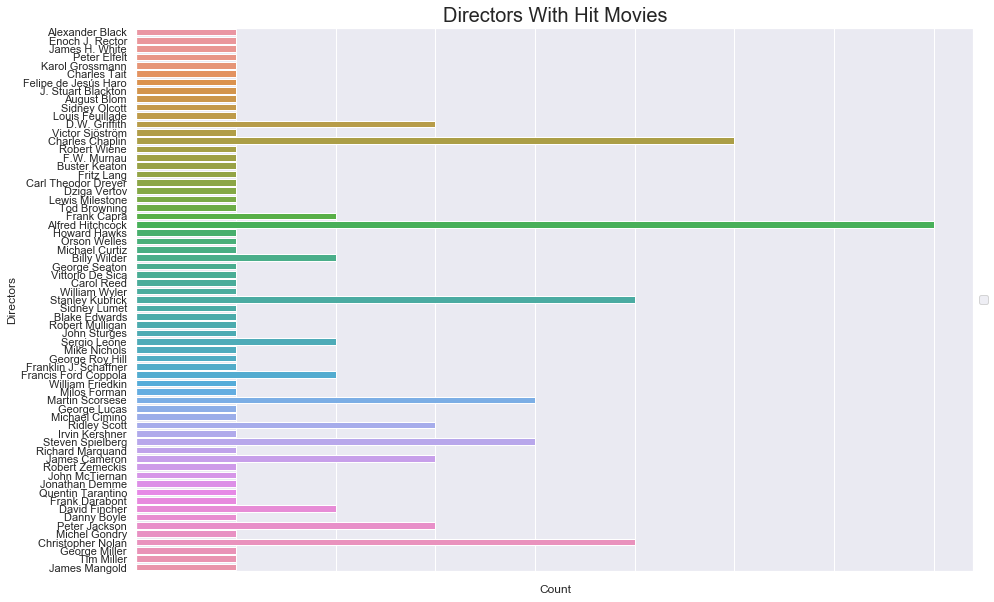

In [63]:
plt.figure(figsize=(15,10))

ax = sns.countplot(y='primaryName', data=movieOfYear_director)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Directors With Hit Movies', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Directors')

plt.show()


We can definitely see there are a few directors that stand out.  Alfred Hitchcock, Charles Chaplin, Chistopher Nolan, Stanley Kubrick and other directors have produced more than one movies that was extremely well received to the audience.

### Popularity Metric & Directors

In [64]:
df_pop_dir = pd.merge(left=df_pop,right=df_name, left_on='directors', right_on='nconst')

In [65]:
#extracts director data and calculate their mean popularity score
directors_popularity = df_pop_dir.groupby('primaryName')['popularity'].mean()

top20=directors_popularity.nlargest(20)



In [66]:
top20

primaryName
Christopher Nolan    0.012118
Frank Darabont       0.010112
John Lasseter        0.008787
Tim Miller           0.008719
Lee Unkrich          0.007561
David Fincher        0.006941
Quentin Tarantino    0.006176
James Cameron        0.006129
Andrew Stanton       0.006111
Joss Whedon          0.005533
Peter Jackson        0.005439
George Lucas         0.005174
J.J. Abrams          0.004899
James Gunn           0.004107
Neill Blomkamp       0.003899
Matthew Vaughn       0.003799
Mel Gibson           0.003764
Zack Snyder          0.003763
Sam Mendes           0.003760
Bryan Singer         0.003586
Name: popularity, dtype: float64

One thing to note is, the popularity metrics is heavily dependednt on the number of votes.  Because of this, older movies tend to have a lower score compared to the more recent movies.  This is why we are seeing directors who have worked in past decade or two compared to MovieOfYear data.

In [67]:

df_pop.to_csv(r'/Users/byungchankim/Downloads/Springboard/capstone1/data/df_pop.csv')